## Tavoite
Selvittää, mitkä havainnot viittaava siihen, että sivuston tarkoitus on tietojen kalastelu

1) result = 1  > tiedonkalastelusivu
2) result = -1 > ei tietojenkalastelusivu

Tuodaan tarvittavat työkalut

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

### Datan käsittely analyysia varten
1) Ladataan csv-tiedosto
2) Dataan tutustuminen (muuttujat ja tietotyypit, määrät, visualisointi)
3) Datan muokkaaminen ja siivoaminen tarpeen mukaan (puuttuvat, poikkeavat arvot, tietotyypit)

In [3]:
df = pd.read_csv("phishing.csv", sep=";")
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


### Dataan tutustuminen

In [4]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Datan muoto: 11.055 havaintoa ja 31 muuttujaa

Kaikki muuttujat ovat kokonaislukuja (INT)

In [ ]:
# Datan muoto,rivit ja sarakkeet 
df.shape

(11055, 31)

In [ ]:
# Datatyypit
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWindow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

Muuttujien saamat arvot ja määrät

In [ ]:
# Muuttujien saamat arvot
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'having_IP_Address': [-1  1]
Unique values in 'URL_Length': [ 1  0 -1]
Unique values in 'Shortining_Service': [ 1 -1]
Unique values in 'having_At_Symbol': [ 1 -1]
Unique values in 'double_slash_redirecting': [-1  1]
Unique values in 'Prefix_Suffix': [-1  1]
Unique values in 'having_Sub_Domain': [-1  0  1]
Unique values in 'SSLfinal_State': [-1  1  0]
Unique values in 'Domain_registeration_length': [-1  1]
Unique values in 'Favicon': [ 1 -1]
Unique values in 'port': [ 1 -1]
Unique values in 'HTTPS_token': [-1  1]
Unique values in 'Request_URL': [ 1 -1]
Unique values in 'URL_of_Anchor': [-1  0  1]
Unique values in 'Links_in_tags': [ 1 -1  0]
Unique values in 'SFH': [-1  1  0]
Unique values in 'Submitting_to_email': [-1  1]
Unique values in 'Abnormal_URL': [-1  1]
Unique values in 'Redirect': [0 1]
Unique values in 'on_mouseover': [ 1 -1]
Unique values in 'RightClick': [ 1 -1]
Unique values in 'popUpWindow': [ 1 -1]
Unique values in 'Iframe': [ 1 -1]
Unique values in 'age

In [ ]:
# Muuttujien arvot ja määrät
for column in df.columns:
    unique_values = df[column].value_counts()
    print(f"Value counts in '{column}':\n{unique_values}\n")

Value counts in 'having_IP_Address':
having_IP_Address
 1    7262
-1    3793
Name: count, dtype: int64

Value counts in 'URL_Length':
URL_Length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64

Value counts in 'Shortining_Service':
Shortining_Service
 1    9611
-1    1444
Name: count, dtype: int64

Value counts in 'having_At_Symbol':
having_At_Symbol
 1    9400
-1    1655
Name: count, dtype: int64

Value counts in 'double_slash_redirecting':
double_slash_redirecting
 1    9626
-1    1429
Name: count, dtype: int64

Value counts in 'Prefix_Suffix':
Prefix_Suffix
-1    9590
 1    1465
Name: count, dtype: int64

Value counts in 'having_Sub_Domain':
having_Sub_Domain
 1    4070
 0    3622
-1    3363
Name: count, dtype: int64

Value counts in 'SSLfinal_State':
SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64

Value counts in 'Domain_registeration_length':
Domain_registeration_length
-1    7389
 1    3666
Name: count, dtype: int64

Value counts in 'Favicon'

Muuttujien väliset korrelaatiot

Muuttujien korrelaatio suhteessa vastemuuttujaan eli selitettävään muuttujaan
1) Eniten korreloivat negatiivisesti seuraavat muuttujat: SSLfinal_State, URL_of_anchor ja 6 muuta
2) Eniten korreloivat positiivisesti Domain_resistration_lenght

In [21]:
corr_matrix = df.corr()

<Axes: >

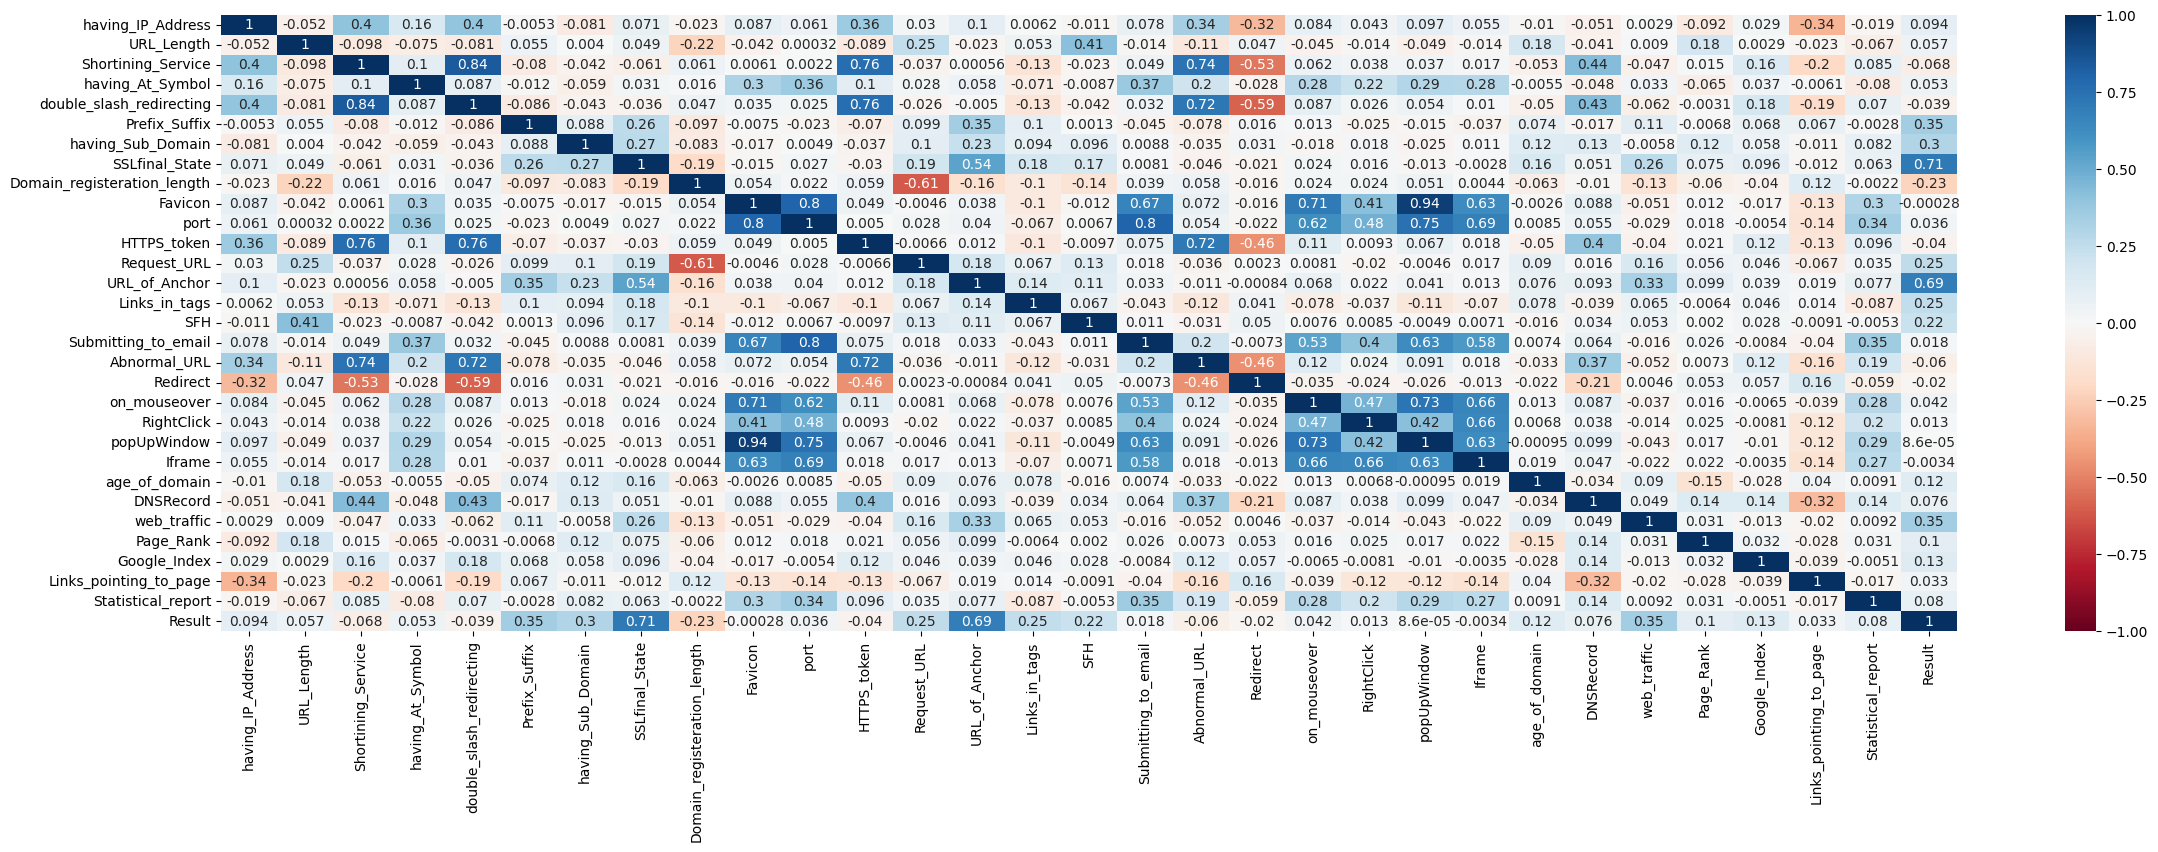

In [22]:
# Tehdään tästä visualisointi, heatmap
plt.figure(figsize=(28,8))
sns.heatmap(corr_matrix, vmin=-1.0, vmax=1.0, cmap="RdBu", annot=True)

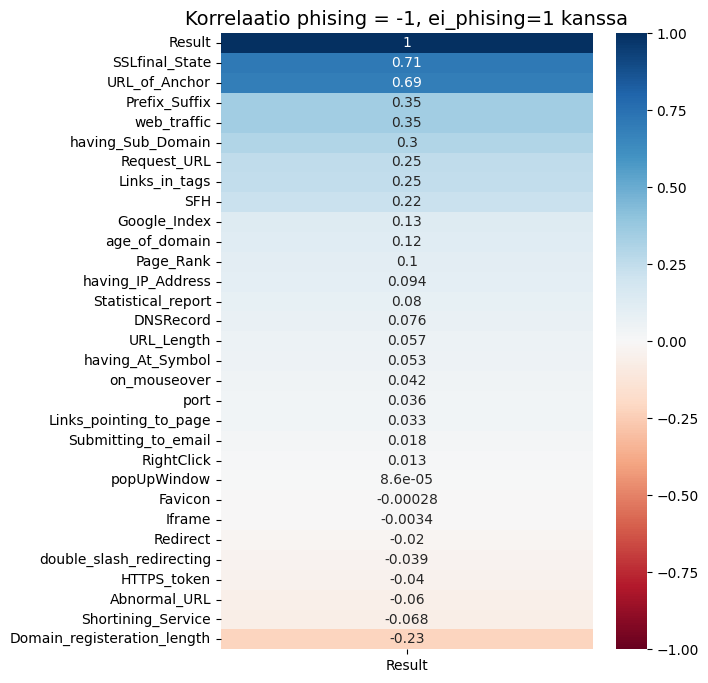

In [16]:
# Otetaan vain korrelaatiot suhteessa Result-muuttujaan
class_corr2 = corr_matrix[["Result"]].sort_values(by="Result", ascending=False)

# Tehdään tästä visualisointi, heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(class_corr2, vmin=-1.0, vmax=1.0, cmap='RdBu', annot=True, cbar=True)

# Add a title
plt.title('Korrelaatio phising = -1, ei_phising=1 kanssa', fontsize=14)
plt.show()

In [ ]:
# Puuttuvien arvojen tsekkaus sarakkeittain
missing_counts = df.isnull().sum()
print(missing_counts)


having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Summaus datankäsittelyvaiheesta
Data on sellaisenaan ok mallinnusta varten.

## Mallinnus päätöspuu -menetelmällä
1) X = kaikki muuttujat paitsi
2) Y = selitettävä muuttuja "Result"

In [25]:
# Decision tree
colnames = df.columns # tekee listan sarakkeiden nimistä
colnames

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
# muuttujien käsittely, X ja Y
X = df.iloc[:, :-1]  # selittävät muuttujat, kaikki muut paitsi Result
Y = df.loc[:, "Result"] # vastemuuttuja

In [39]:
# opetus - ja testiaineiston muodostaminen
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8844, 30)
(2211, 30)


In [40]:
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
# print(tree.export_text(classifier))
print(tree.export_text(classifier, feature_names = colnames[:30]))

|--- SSLfinal_State <= 0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- class: -1
|   |--- URL_of_Anchor >  -0.50
|   |   |--- Links_in_tags <= -0.50
|   |   |   |--- class: -1
|   |   |--- Links_in_tags >  -0.50
|   |   |   |--- class: -1
|--- SSLfinal_State >  0.50
|   |--- URL_of_Anchor <= -0.50
|   |   |--- Prefix_Suffix <= 0.00
|   |   |   |--- class: -1
|   |   |--- Prefix_Suffix >  0.00
|   |   |   |--- class: 1
|   |--- URL_of_Anchor >  -0.50
|   |   |--- web_traffic <= 0.50
|   |   |   |--- class: 1
|   |   |--- web_traffic >  0.50
|   |   |   |--- class: 1



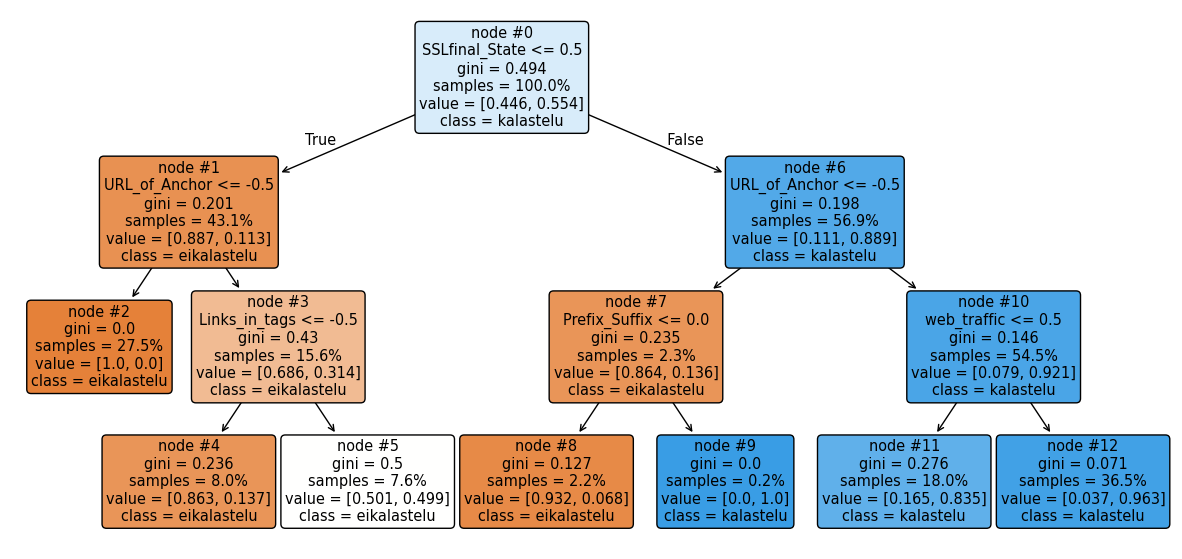

In [42]:
# Päätöspuun visualisointi [-1,1] eli [eikalastelu, kalastelu]
plt.figure(figsize=(15,7))
tree.plot_tree(classifier, node_ids=True, class_names=["eikalastelu","kalastelu"], filled=True, proportion=True, rounded=True, feature_names= colnames[:30]) 
#node_ids lisää järjestyksen, class_names antaa luokkien nimet, rounded pyöristää reunat
plt.show()

## Mallin arviointi

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [44]:
Y_pred = classifier.predict(X_test)

In [45]:

cm = confusion_matrix(Y_test, Y2_pred,)
print("Confusionmatrix eli sekaannusmatriisi: \n", cm) # voi listätä normalize("all") >>> antaa taulukon prosentteina, jos ymmärsin oikein

accuracy = accuracy_score(Y_test, Y_pred)
print("Tarkkuus eli accuracy (laskettu opetusjoukosta) = %.3f" %(accuracy)) #%.3f tekee kolme desimaalia
print(f"Tarkkuus...{accuracy:.3f}")

# print(classification_report(Y2_test, Y2_pred,labels=("huonot","hyvät"))) --> ei toimi
# print(classification_report(Y2_test, Y2_pred)) --> toimii, mutta vain arvot 1 ja 2

label_names = ("eikalastelu","kalastelu")

print(classification_report(Y_test, Y_pred, target_names=label_names)) #target_names : array-like of shape (n_labels,), default=None
# Optional display names matching the labels (same order).

Confusionmatrix eli sekaannusmatriisi: 
 [[ 865   91]
 [  99 1156]]
Tarkkuus eli accuracy (laskettu opetusjoukosta) = 0.914
Tarkkuus...0.914
              precision    recall  f1-score   support

 eikalastelu       0.90      0.90      0.90       956
   kalastelu       0.93      0.92      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



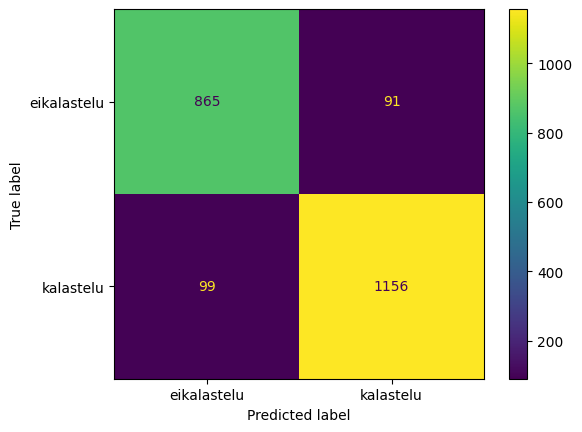

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=["eikalastelu","kalastelu"],)
cmd.plot()
plt.show()